In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [37]:
os.getcwd()

'c:\\Users\\Hong\\Desktop\\Acorn_File'

In [38]:
customer_info = pd.read_excel('./1.1 고객기본정보(개인정보 제외)_추출.xlsx')
review_info = pd.read_excel('./2.3 상품평정보(개인정보 제외)_추출.xlsx')
product_info = pd.read_excel('./3.1 상품정보_추출.xlsx')
order_info = pd.read_excel('./3.1 주문정보(개인정보 제외)_추출.xlsx')
payment_info = pd.read_excel('./4.1 결제정보(개인정보 제외)_추출.xlsx')
refund_info = pd.read_excel('./5.1 환불정보(개인정보 제외)_추출.xlsx')


In [39]:
a = pd.merge(customer_info,order_info, on = '회원번호', how = 'left')
b = pd.merge(a,payment_info, on = '주문번호', how = 'left')
c = pd.merge(b, refund_info, on = '주문번호', how = 'left')
d = pd.merge(c,product_info, on = '상품번호', how = 'left')
tot_df = pd.merge(d,review_info, on = '회원번호', how = 'left')
tot_df.head(1)

,회원번호,회원등급,가입일,최종방문일,본인인증,성별,나이,자주쓰는배송지 도로명,자주쓰는배송지 지번,주문번호,...,상품구분,대표판매가,배송비_y,판매상태,전시상태,상품번호_y,상품평번호,입점업체명,별점,등록일
0,1476,임직원,2016-11-05 00:00:00,2018-04-30 17:34:58,-,M,31,서울 금천구 가마산로 70,-,NaN,...,NaN,NaN,NaN,NaN,NaN,G1709111052_0885,125.0,(주)라이마스,5.0,2017-09-20 18:05:32


In [40]:
tot_df.columns

Index(['회원번호', '회원등급', '가입일', '최종방문일', '본인인증', '성별', '나이', '자주쓰는배송지 도로명',
       '자주쓰는배송지 지번', '주문번호', '순번', '주문일시', '진행구분_x', '배송지', '상품번호_x', '상품명_x',
       '옵션명', '수량', '판매가', '배송비_x', '쿠폰할인액', '회원주문여부', '결제번호', '결제일시', '진행구분명',
       '결제수단_x', '결제금액', '카드사', '할부개월_x', '환불번호', '진행구분_y', '결제수단_y', '환불금액',
       '할부개월_y', '환불일자', '상품명_y', '업체명', '카테고리명', '브랜드명', '상품구분', '대표판매가',
       '배송비_y', '판매상태', '전시상태', '상품번호_y', '상품평번호', '입점업체명', '별점', '등록일'],
      dtype='object')

In [41]:
tot_df = tot_df[['회원번호', '회원등급', '가입일', '최종방문일', '본인인증', '성별', '나이', '자주쓰는배송지 도로명',
       '자주쓰는배송지 지번', '주문번호', '순번', '주문일시','진행구분_x', '배송지', '상품번호_x', '상품명_x',
       '옵션명', '수량', '판매가', '배송비_x', '쿠폰할인액', '회원주문여부', '결제번호', '결제일시', '진행구분명',
       '결제수단_x', '결제금액', '카드사', '할부개월_x', '환불번호','환불금액','환불일자','업체명', '카테고리명',
       '브랜드명', '상품구분', '대표판매가','판매상태', '전시상태','상품평번호', '입점업체명', '별점', '등록일']]

In [42]:
tot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101741 entries, 0 to 101740
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   회원번호         101741 non-null  int64         
 1   회원등급         101741 non-null  object        
 2   가입일          101741 non-null  object        
 3   최종방문일        101741 non-null  object        
 4   본인인증         94470 non-null   object        
 5   성별           101741 non-null  object        
 6   나이           65863 non-null   object        
 7   자주쓰는배송지 도로명  101741 non-null  object        
 8   자주쓰는배송지 지번   101741 non-null  object        
 9   주문번호         61661 non-null   float64       
 10  순번           61661 non-null   float64       
 11  주문일시         61661 non-null   object        
 12  진행구분_x       61661 non-null   object        
 13  배송지          61522 non-null   object        
 14  상품번호_x       61661 non-null   object        
 15  상품명_x        61661 non-null   obje

In [43]:
tot_df = tot_df.rename(columns={'진행구분_x':'진행구분',
                                '상품번호_x':'상품번호',
                                '상품명_x':'상품명',
                                '배송비_x':'배송비',
                                '결제수단_x':'결제수단',
                                '할부개월_x':'할부개월',
                                })

In [44]:
tot_df.columns

Index(['회원번호', '회원등급', '가입일', '최종방문일', '본인인증', '성별', '나이', '자주쓰는배송지 도로명',
       '자주쓰는배송지 지번', '주문번호', '순번', '주문일시', '진행구분', '배송지', '상품번호', '상품명', '옵션명',
       '수량', '판매가', '배송비', '쿠폰할인액', '회원주문여부', '결제번호', '결제일시', '진행구분명', '결제수단',
       '결제금액', '카드사', '할부개월', '환불번호', '환불금액', '환불일자', '업체명', '카테고리명', '브랜드명',
       '상품구분', '대표판매가', '판매상태', '전시상태', '상품평번호', '입점업체명', '별점', '등록일'],
      dtype='object')

In [45]:
tot_df[['회원번호','결제금액']].value_counts()

회원번호   결제금액    
2143   300.0       264
       29000.0     198
       13740.0     198
       36000.0     198
       3000.0      165
                  ... 
43264  331500.0      1
43257  8100.0        1
       1000.0        1
43256  82890.0       1
57791  15900.0       1
Name: count, Length: 22041, dtype: int64

In [46]:
tot_df.groupby('회원번호', as_index =False).agg(sale_amount = ('결제금액','sum')).sort_values('sale_amount', ascending = False)

,회원번호,sale_amount
42514,49833,465800000.0
266,2143,391160814.0
921,2802,138010080.0
206,2083,73186500.0
14,1886,60000780.0
...,...,...
17445,22037,0.0
17446,22038,0.0
17447,22039,0.0
17448,22040,0.0


In [48]:
# 주문일시가 있지만 결제금액이 없는 경우 주문취소이므로 
# 결측값 모두 삭제처리했습니다.
tot_df = tot_df.dropna(subset = ['주문일시','결제금액','회원주문여부','진행구분'])

In [50]:
aggregations = {'주문일시' : 'max',
                '주문번호' : 'count',
                '결제금액' : 'sum'}

In [79]:
cust_df = tot_df.groupby('회원번호').agg(aggregations)
cust_df = cust_df.rename(columns = {'주문일시' : 'Recency',
                                  '주문번호' : 'Frequency',
                                  '결제금액' : 'Monetary'})
cust_df.Recency = pd.to_datetime(cust_df['Recency'])
cust_df['Recency'] = dt.datetime(2018,11,7) - cust_df['Recency']
cust_df.Recency = cust_df['Recency'].apply(lambda x: x.days + 1)

Q1 = np.percentile(cust_df['Recency'],25)
Q3 = np.percentile(cust_df['Recency'],75)
IQR = Q3 - Q1
lower = Q1 - IQR * 1.5
upper = Q3 + IQR * 1.5
cust_df = cust_df[(cust_df['Recency'] > lower) & (cust_df['Recency'] < upper)]

Q1 = np.percentile(cust_df['Monetary'],25)
Q3 = np.percentile(cust_df['Monetary'],75)
IQR = Q3 - Q1
lower = Q1 - IQR * 1.5
upper = Q3 + IQR * 1.5
cust_df = cust_df[(cust_df['Monetary'] > lower) & (cust_df['Monetary'] < upper)]

cust_df = cust_df[cust_df['Frequency'] < 6000]

<Axes: >

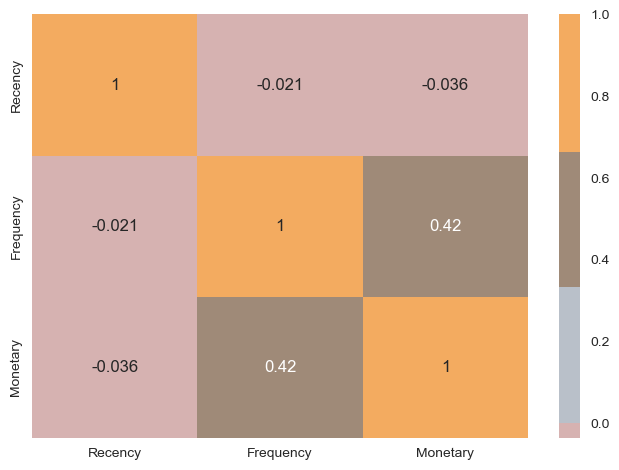

In [80]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
cor = cust_df.corr()
sns.heatmap(cor, annot = True, cmap = cmap, center = 0)

In [81]:

#Scaling
scaler = StandardScaler()
scaler.fit(cust_df)
scaled_ds = pd.DataFrame(scaler.transform(cust_df),columns= cust_df.columns )


In [82]:
pca = PCA(n_components = 3)
pca.fit(cust_df)
PCA_ds = pd.DataFrame(pca.transform(cust_df), columns = (['col1','col2','col3']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,7856.0,1.778238e-12,56983.340584,-56708.874151,-38308.875203,-24208.872383,20611.124634,227291.123176
col2,7856.0,-3.704663e-15,53.781562,-82.644538,-45.812601,-4.154639,30.404224,153.602841
col3,7856.0,5.788536e-17,1.150893,-3.341865,-0.493438,0.025938,0.177836,20.968197


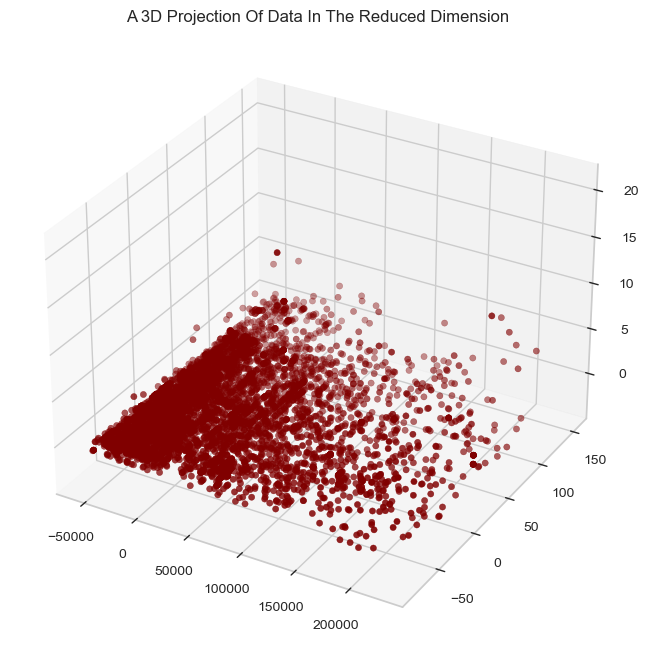

In [83]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


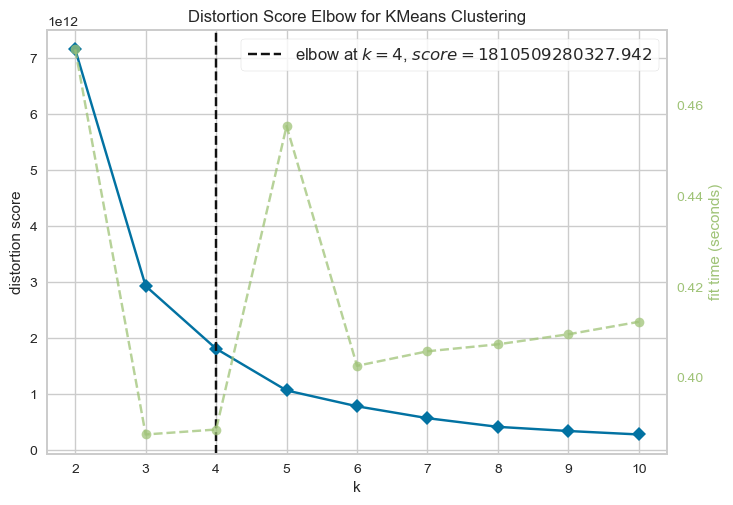

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_ds)
Elbow.show()

In [ ]:
AC = KMeans(n_clusters=4)

yhat_AC = AC.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_AC

cust_df["Clusters"]= yhat_AC

In [86]:
cluster_means = PCA_ds.groupby(yhat_AC).mean()

# 클러스터의 평균값을 기준으로 정렬
sorted_clusters = cluster_means.sort_values(by='col1').index

# 클러스터 라벨을 정렬된 순서로 매핑
cluster_map = {old: new for new, old in enumerate(sorted_clusters)}
sorted_labels = np.array([cluster_map[label] for label in yhat_AC])

# 원본 데이터프레임에 정렬된 클러스터 라벨 추가
cust_df["Clusters"] = sorted_labels
PCA_ds["Clusters"] = sorted_labels

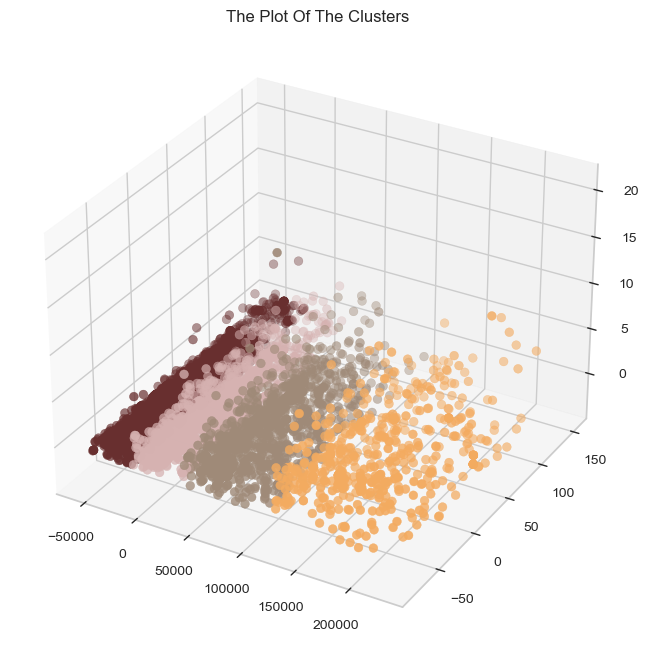

In [87]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

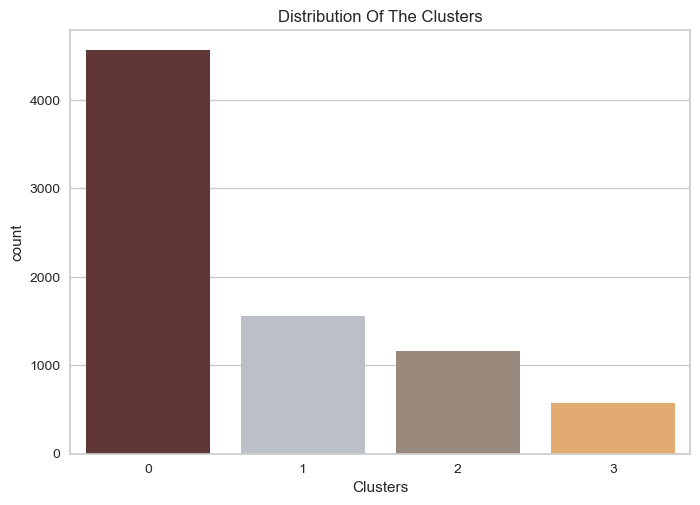

In [88]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=PCA_ds["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

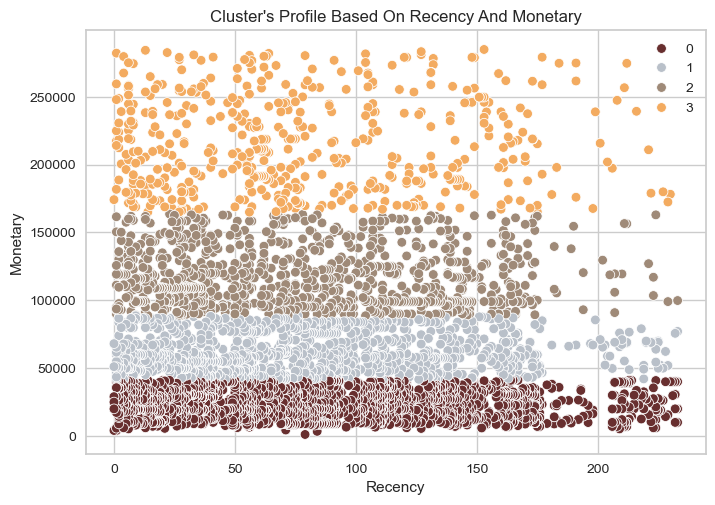

In [89]:
pl = sns.scatterplot(data = cust_df,x=cust_df["Recency"], y=cust_df["Monetary"],hue=cust_df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Recency And Monetary")
plt.legend()
plt.show()

In [90]:
print('0 : ',cust_df[cust_df['Clusters'] == 0].describe()[['Recency','Frequency','Monetary']])
print('\n1 : ',cust_df[cust_df['Clusters'] == 1].describe()[['Recency','Frequency','Monetary']])
print('\n2 : ',cust_df[cust_df['Clusters'] == 2].describe()[['Recency','Frequency','Monetary']])
print('\n3 : ',cust_df[cust_df['Clusters'] == 3].describe()[['Recency','Frequency','Monetary']])

0 :             Recency    Frequency      Monetary
count  4562.000000  4562.000000   4562.000000
mean     83.876370     1.906620  22119.452652
std      53.863214     0.510409   9062.351431
min       0.000000     1.000000   1000.000000
25%      37.000000     2.000000  16300.000000
50%      86.000000     2.000000  19400.000000
75%     111.000000     2.000000  29585.000000
max     233.000000     8.000000  41310.000000

1 :             Recency    Frequency      Monetary
count  1559.000000  1559.000000   1559.000000
mean     75.309173     2.349583  60868.402822
std      53.399210     1.078580  12759.867976
min       0.000000     1.000000  41540.000000
25%      33.000000     2.000000  49900.000000
50%      62.000000     2.000000  57900.000000
75%     110.000000     3.000000  69900.000000
max     233.000000    10.000000  88500.000000

2 :             Recency    Frequency       Monetary
count  1159.000000  1159.000000    1159.000000
mean     76.194133     2.698878  116263.882657
std      53.41

In [94]:
cust_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'Clusters'], dtype='object')

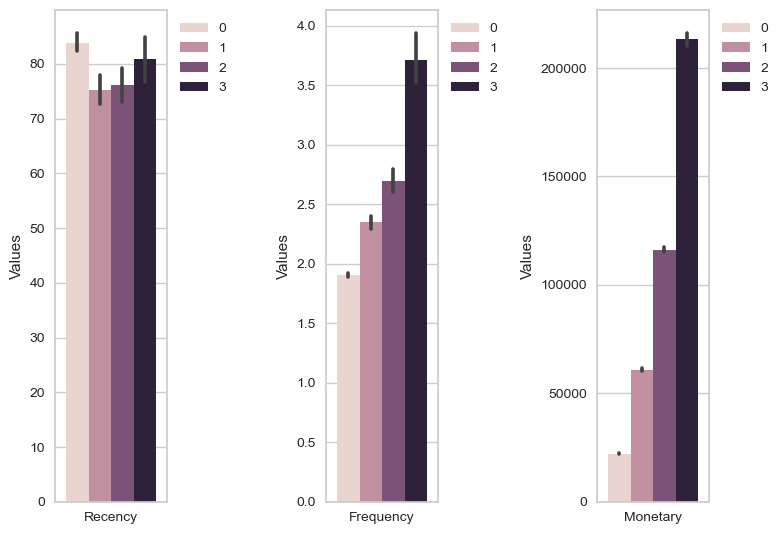

In [128]:
# 먼저 cust_df를 long format으로 변환합니다.
cust_melted = cust_df.melt(id_vars='Clusters', var_name='Features', value_name='Values')
Recency = cust_melted[cust_melted.Features == 'Recency']
Frequency = cust_melted[cust_melted.Features == 'Frequency']
Monetary = cust_melted[cust_melted.Features == 'Monetary']

# barplot 생성
fig, ax = plt.subplots(1, 3)
sns.barplot(x='Features', y='Values', hue='Clusters',data=Recency, ax = ax[0])
ax[0].legend(loc = 'upper left', bbox_to_anchor = (1, 1))
ax[0].set_xlabel('')
sns.barplot(x='Features', y='Values', hue='Clusters', data=Frequency, ax = ax[1])
ax[1].legend(loc = 'upper left', bbox_to_anchor = (1, 1))
ax[1].set_xlabel('')

sns.barplot(x='Features', y='Values', hue='Clusters', data=Monetary, ax = ax[2])
ax[2].legend(loc = 'upper left', bbox_to_anchor = (1, 1))
ax[2].set_xlabel('')

plt.tight_layout()
plt.show()
